In [31]:
import pandas as pd 
import numpy as np
import warnings
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from  sklearn.tree import plot_tree
warnings.filterwarnings("ignore")
from sklearn.metrics import f1_score

# load dataset

In [2]:
df = pd.read_csv('Iris.csv') 

In [3]:
df 

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


# preprocessing

1)Na_imputetion

In [4]:
df .dropna(axis=0, #Determine if rows or columns which contain missing values are removed.
                 how='all', #Determine if row or column is removed from DataFrame
                 thresh=None, #Require that many non-NA values
                 subset=None, #
                 inplace=False)#If True, do operation inplace and return None.)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
2)Lebel_encodeing

In [5]:
le = preprocessing.LabelEncoder()
le1=preprocessing.LabelEncoder()
df['labelencoded_Species']=le.fit_transform(list(df['Species']))


In [6]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,labelencoded_Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0
...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica,2
146,147,6.3,2.5,5.0,1.9,Iris-virginica,2
147,148,6.5,3.0,5.2,2.0,Iris-virginica,2
148,149,6.2,3.4,5.4,2.3,Iris-virginica,2


In [16]:
df_preprocess=df.drop(['Species','Id'], axis = 1)

In [17]:
X1=df_preprocess.drop(['labelencoded_Species'], axis = 1)
y1=df_preprocess['labelencoded_Species']

In [18]:
scaled_X_1 = preprocessing.scale(X1)
X_train1, X_test1, y_train1, y_test1 = train_test_split(scaled_X_1, y1)

# Model_Preparaition

In [19]:
DL=DecisionTreeClassifier( criterion='gini', #The function to measure the quality of a split.(fixed)
                       splitter='best',#The strategy used to choose the split at each node.(fixed)
                       max_depth=None, #The maximum depth of the tree that expanded until all leaves contain less than (chosen)                                              min_samples_split samples.(fixed )
                       min_samples_split=2,#The minimum number of samples required to split an internal node (fixed)
                       min_samples_leaf=1, #The minimum number of samples required to be at a leaf node.(fixed)
                       min_weight_fraction_leaf=0.0,#Samples have equal weight when sample_weight is not provided.(fixed)
                       max_features=None, #The number of features to consider when looking for the best split(chosen.)
                       random_state=None, #Controls the randomness of the estimator. 
                       max_leaf_nodes=None, #Grow a tree with max_leaf_nodes in best-first fashion.(fixed)
                       min_impurity_decrease=0.0, #starting criteria for A node to split.(fiixed)
                       min_impurity_split=None, #Threshold for early stopping in tree growth. (fiixed)
                       class_weight=None, #Weights associated with classes 
                       ccp_alpha=0.0#Complexity parameter used for Minimal Cost-Complexity Pruning.(fiixed.)
                      )

In [20]:
parameters4={'max_features':['auto', 'sqrt', 'log2'],#The number of features to consider when looking for the best split
             'max_depth':[3,4,5,8], ##Complexity parameter used for Minimal Cost-Complexity Pruning.
             'ccp_alpha':[0,0.01,0.03,0.1]##Complexity parameter used for Minimal Cost-Complexity Pruning.
            }

In [21]:
clf_re = GridSearchCV(DL,#estimator funtions 
                    parameters4,#define parameters
                    scoring='accuracy',#Strategy to evaluate the performance of the cross-validated model on the test set
                    refit=True,#Refit an estimator using the best found parameters on the whole dataset.
                    n_jobs=None,#1 CPU core used when parallelizing over classes
                    cv=None,#None, to use the default 5-fold cross validation,
                    verbose=0,#not to show wearning massage
                    pre_dispatch='2*n_jobs',
                   return_train_score=False
                  )

In [22]:
model2=clf_re.fit(X_train1, y_train1)

In [23]:
model2.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.01, max_depth=3, max_features='auto')

In [24]:
model2.best_score_

0.9735177865612649

In [ ]:
# MOdel_selection

In [25]:
model=DecisionTreeClassifier(ccp_alpha=0.01, max_depth=3, max_features='auto')

In [26]:
tree=model.fit(X_train1, y_train1)

In [ ]:
#Ploting

[Text(133.92000000000002, 190.26, 'X[2] <= -0.744\ngini = 0.663\nsamples = 112\nvalue = [34, 35, 43]'),
 Text(66.96000000000001, 135.9, 'gini = 0.0\nsamples = 34\nvalue = [34, 0, 0]'),
 Text(200.88000000000002, 135.9, 'X[3] <= 0.593\ngini = 0.495\nsamples = 78\nvalue = [0, 35, 43]'),
 Text(133.92000000000002, 81.53999999999999, 'X[0] <= 1.462\ngini = 0.149\nsamples = 37\nvalue = [0, 34, 3]'),
 Text(66.96000000000001, 27.180000000000007, 'gini = 0.105\nsamples = 36\nvalue = [0, 34, 2]'),
 Text(200.88000000000002, 27.180000000000007, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(267.84000000000003, 81.53999999999999, 'gini = 0.048\nsamples = 41\nvalue = [0, 1, 40]')]

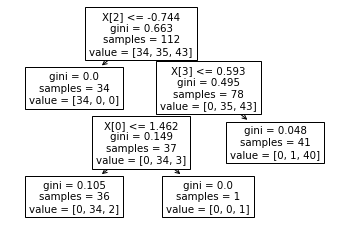

In [29]:
plot_tree(tree, max_depth=None)

In [30]:
y_pred_1=model.predict(X_test1)

In [32]:
f1_score(y_test1,y_pred_1, average='macro') 

0.9301587301587301

#Bais score =0.9735177865612649
#Varience Score=0.9301587301587301
model cointain low varience and low bais so it is good 